In [1]:
# Imports
import pyinputplus as pyip
import matplotlib.pyplot as plt
import string
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.impute import SimpleImputer
from IPython.display import display
import ipywidgets as widgets

In [2]:
# Retrieve the training dataset to be used in the modeling process
url = 'https://raw.githubusercontent.com/Krickul/C964/main/train.csv'
# The features derived from the training dataset assigned to x
x = pd.read_csv(url)
# The output from the training dataset assigned to y
y = x['SalePrice']

In [3]:
# Dataset Features Overview
# Summary statistics for numeric features in the train dataset
numeric_features = x.select_dtypes(include=[np.number])
numeric_summary = numeric_features.describe()

# Display the summary statistics
print("Summary Statistics for Numeric Features:")
display(numeric_summary)

Summary Statistics for Numeric Features:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


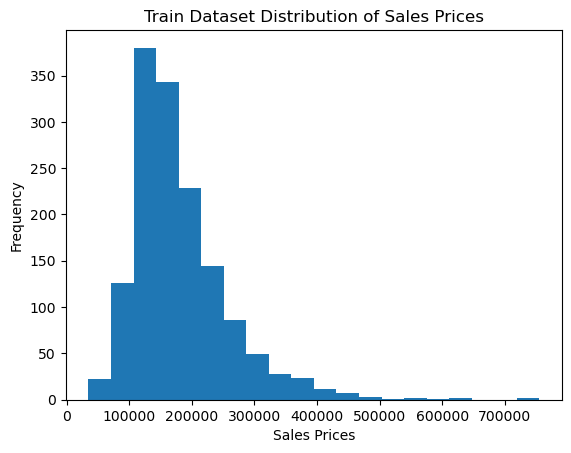

In [4]:
# Visualize the distribution of sales prices in the training dataset
plt.hist(y, bins=20)
plt.xlabel('Sales Prices')
plt.ylabel('Frequency')
plt.title('Train Dataset Distribution of Sales Prices')
plt.show()

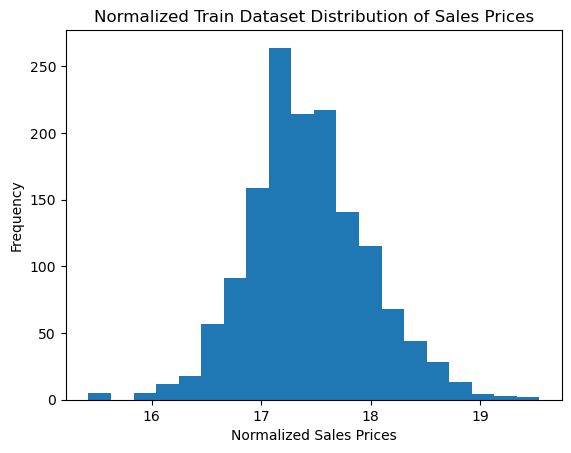

In [5]:
# Normalize the sales price distribution in the training dataset
offset_log = 9000
plt.hist(np.log2(y + offset_log), bins=20)
plt.xlabel('Normalized Sales Prices')
plt.ylabel('Frequency')
plt.title('Normalized Train Dataset Distribution of Sales Prices')
plt.show()


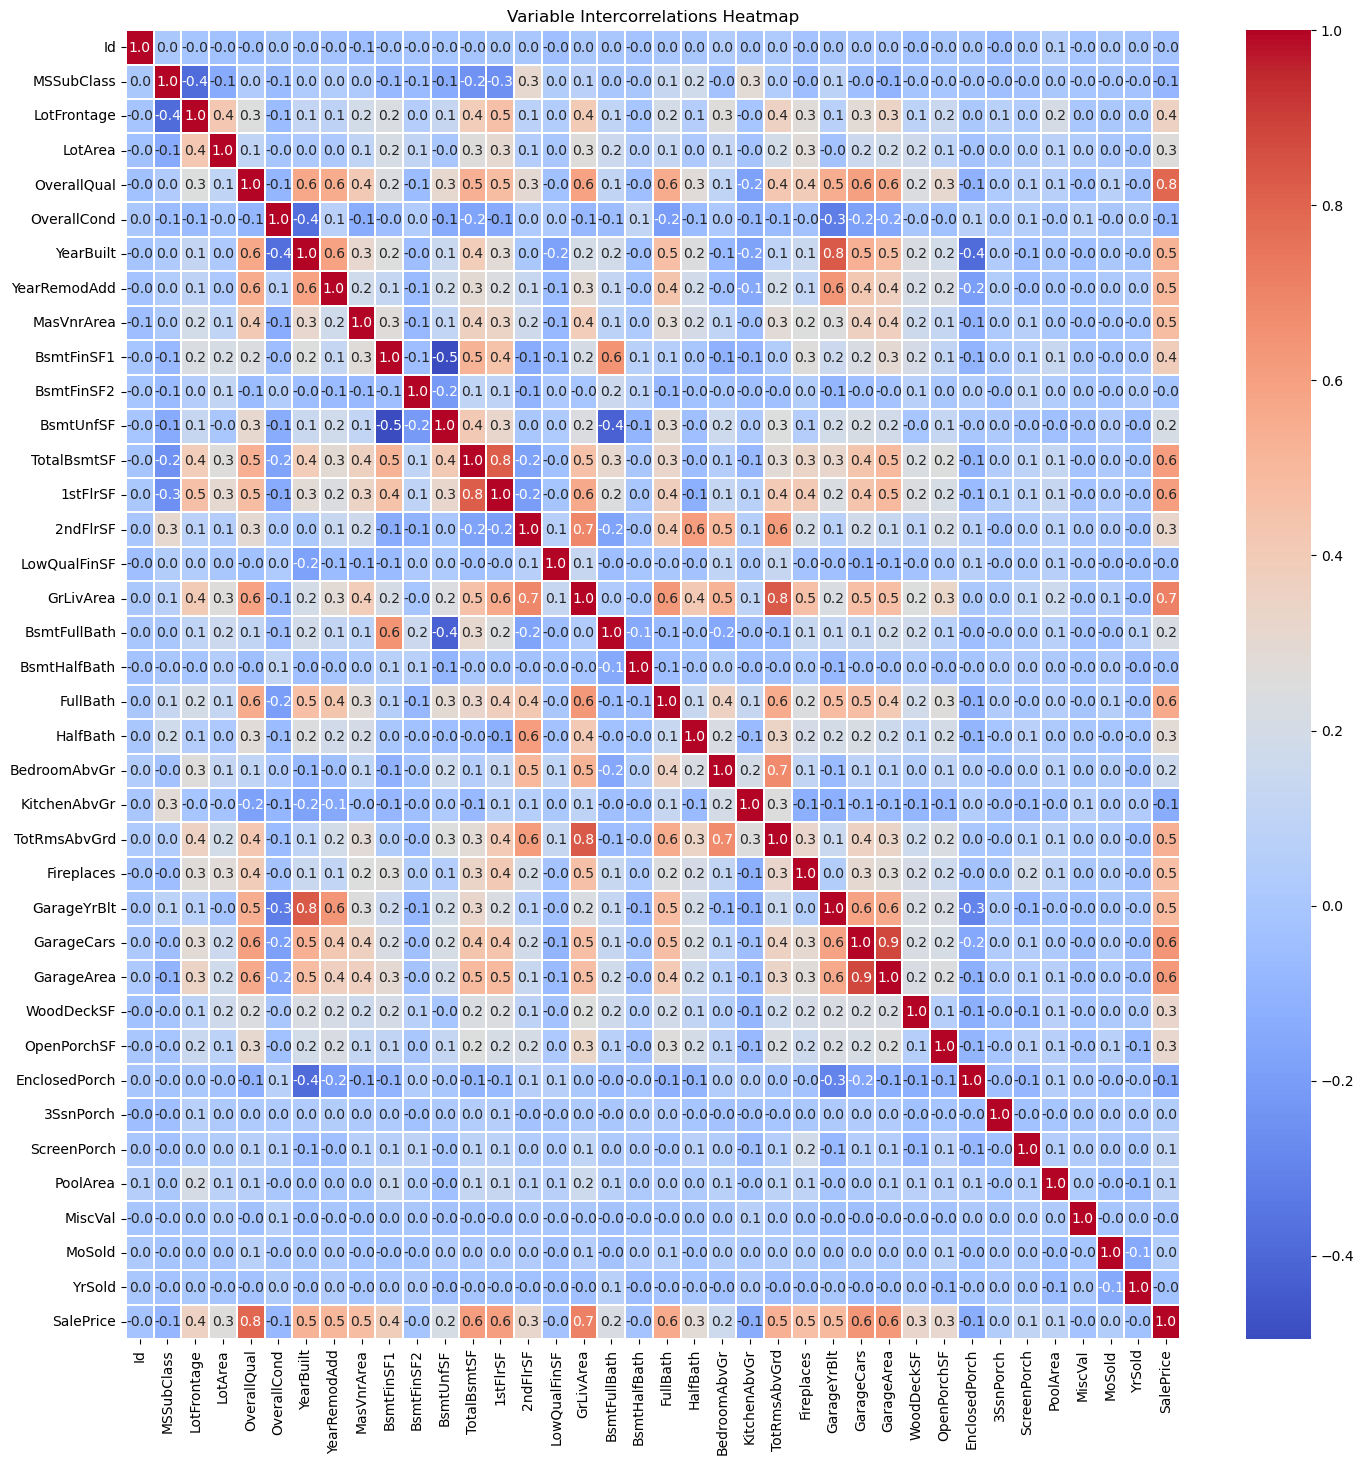

In [6]:
# Visualize a heatmap of variable intercorrelations to assist in selecting regressors for the target variable
plt.figure(figsize=(17, 17))
train_corr = x.corr(numeric_only=True)  # Explicitly set numeric_only=True
sns.heatmap(train_corr, cmap="coolwarm", annot=True, fmt='.1f', linewidths=0.06)
plt.title('Variable Intercorrelations Heatmap')
plt.show()

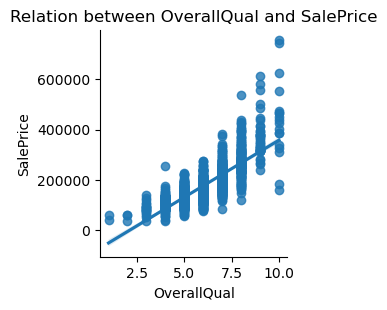

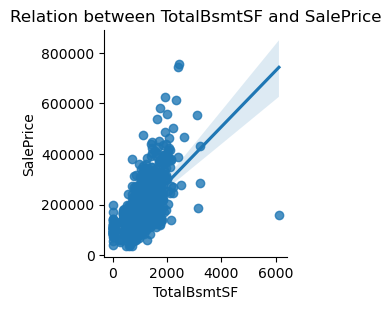

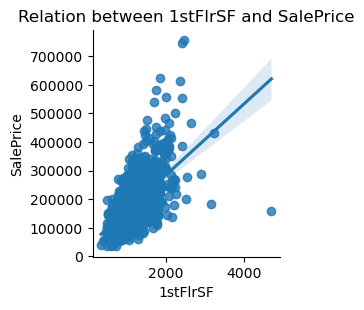

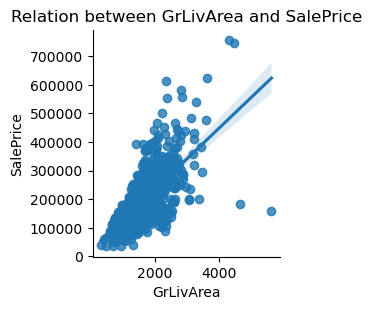

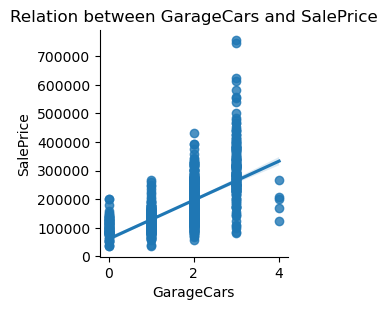

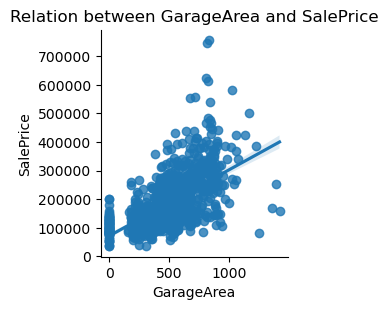

In [7]:
# Define the correlation threshold for feature selection
corr_threshold = 0.6

# Compute the correlation matrix for numeric features
numeric_features = x.select_dtypes(include=[np.number])
train_corr = numeric_features.corr()

# Select features with correlation >= corr_threshold with SalePrice
sig_corr = train_corr.index[train_corr['SalePrice'] >= corr_threshold]
features = sig_corr.tolist()

# Plot relation between features and SalePrice
for feature in features[:6]:
    sns.lmplot(x=feature, y='SalePrice', data=x, height=3)
    plt.title(f'Relation between {feature} and SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    
plt.show()

In [8]:
# Drop outliers from the dataset
x = x.drop(x['TotalBsmtSF'][x['TotalBsmtSF'] > 4000].index)
x = x.drop(x['1stFlrSF'][x['1stFlrSF'] > 4000].index)
x = x.drop(x['GrLivArea'][x['GrLivArea'] > 4000].index)
x = x.drop(x['GarageArea'][x['GarageArea'] > 1200].index)

# Update the output variable
y = x['SalePrice']

# Select the significant regressors for analysis
sig_x = x[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
feat_labels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(sig_x, y, test_size=0.5, random_state=0)

# Create Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=160, random_state=48)

# Handle missing values by replacing NaN with zeros
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)

# Train Random Forest Regressor model
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=160, random_state=48)

In [9]:
# Calculate the real estate price prediction by analyzing the input values from the harvested widgets using 
# regression analysis. The prediction is based on the regression model trained on the real estate dataset.
def calculate_prediction(quality: widgets.IntSlider, 
                         total_basement_sqft: widgets.IntSlider, 
                         first_flr_sqft: widgets.IntSlider, 
                         above_grade_area: widgets.IntSlider, 
                         garage_cars: widgets.IntSlider, 
                         garage_area: widgets.IntSlider) -> float:
   
    # Predict with input
    predicted_price = regressor.predict([[quality.value, 
                                          total_basement_sqft.value, 
                                          first_flr_sqft.value, 
                                          above_grade_area.value, 
                                          garage_cars.value, 
                                          garage_area.value]])
    return predicted_price

<h2 style="font-size: 32px; color: blue">Select the desired property feature values and click 'Value Prediction'</h2>

In [10]:
# Widget sliders collect input
quality = widgets.IntSlider(min=0, max=10, step=1, description='Quality')
total_basement_sqft = widgets.IntSlider(min=0, max=3000, step=1, description='Bsmnt Sqft')
first_flr_sqft = widgets.IntSlider(min=0, max=3000, step=1, description='1stFlr Sqft')
above_grade_area = widgets.IntSlider(min=0, max=4000, step=1, description='Tot. Liv Area')
garage_cars = widgets.IntSlider(min=0, max=4, step=1, description='Car Garage #')
garage_area = widgets.IntSlider(min=0, max=1200, step=1, description='Garage Sqft')

# Arrange the sliders in a vertical box layout
widget_box = widgets.VBox([quality, total_basement_sqft, first_flr_sqft, above_grade_area, garage_cars, garage_area])

# Create a tab for the sliders
tab = widgets.Tab()
tab.children = [widget_box]
tab.set_title(0, 'Property Details')

# Display the tab
tab


In [11]:
# Handle the button click event for the value prediction.
# Calculate the prediction and display the result and error analysis.
def handle_value_prediction_button_click(button):
    # Get the prediction
    predict = calculate_prediction(quality, total_basement_sqft, first_flr_sqft, above_grade_area, garage_cars, garage_area)

    # Extract the single prediction value
    predict_value = predict[0]

    # Clear output and print the prediction and error analysis
    with out:
        out.clear_output()
        formatted_predict = f"${predict_value:,.2f}" 
        print("Value Prediction")
        print("-----------------")
        print(f"Our model estimates the value of a home with these features to be approximately {formatted_predict}.\n")
        print("Error Analysis")
        print("--------------")
        mean_abs_error = metrics.mean_absolute_error(y_test, y_train)
        print(f"Mean Absolute Error: {mean_abs_error:.2f}")

# Create the button for Value Prediction and harvest input from sliders
calc_button = widgets.Button(description='Value Prediction')
out = widgets.Output()

# Associate the button click event with the function
calc_button.on_click(handle_value_prediction_button_click)

# Display the button and output together
widgets.VBox([calc_button, out])